In [214]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import easyocr
import imutils
import os

(54, 129, 3)

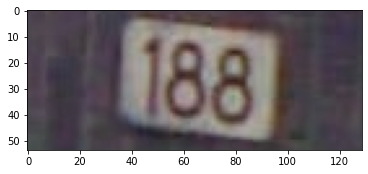

In [283]:
img = cv2.imread('train/train/209.png')
plt.imshow(img)
img.shape

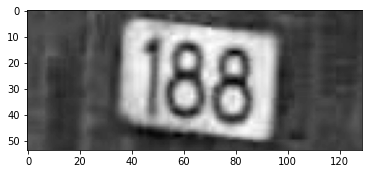

In [284]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

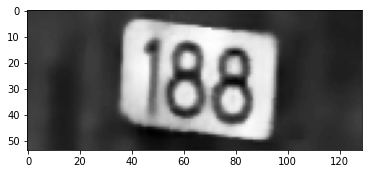

In [285]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Better than gaussian because it keeps edges sharp
plt.imshow(bfilter,cmap='gray')

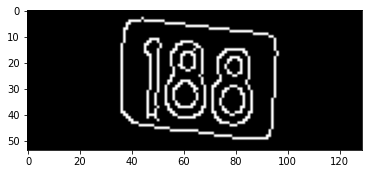

In [286]:
edges=cv2.Canny(bfilter,30,200)
plt.imshow(edges,cmap='gray')

In [287]:
keypoints= cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
countours=imutils.grab_contours(keypoints)
sorted_contours=sorted(countours,key=cv2.contourArea,reverse=True)[0:3]

In [288]:
len(sorted_contours)

3

In [289]:
locations=[]
for cnt in sorted_contours:
    approx=cv2.approxPolyDP(cnt,10,True)
    if len(approx)==4:
        locations.append(approx)
len(locations)

2

In [290]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[locations[0]],-1,255,-1)

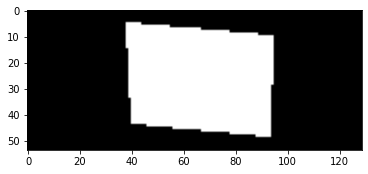

In [291]:
plt.imshow(new_image,cmap='gray')

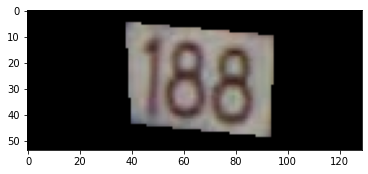

In [292]:
new_image=cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image,cmap='gray')

In [293]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))

In [294]:
cropped_image=gray[x1:x2+1,y1:y2+1]

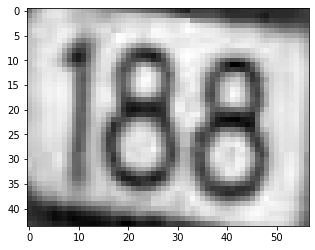

In [295]:
plt.imshow(cropped_image,cmap='gray')

In [296]:
# reader=easyocr.Reader(['en'])
# result=reader.readtext(cropped_image,allowlist ='0123456789')
# result


In [297]:
res=cv2.rectangle(img,tuple(locations[0][0][0]),tuple(locations[0][2][0]),(0,255,0),3)

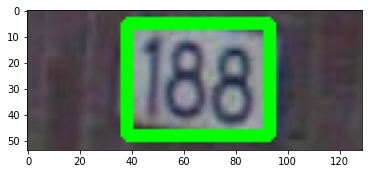

In [298]:
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))